<a href="https://colab.research.google.com/github/HuberM1998/UFPel/blob/master/Relatorio2_MathausHuber.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

O método de eliminação gaussiana consiste em aplicar sucessivas operações elementares num sistema linear, para o transformar num sistema de mais fácil resolução.

Para fazer a implentação da eliminação gaussiana eu usei os elementos da diagonal principal de A como pivos para zerar os elementos da mesma coluna.

In [ ]:
import numpy as np

def resolveTS(A,b): #A Triangular Superior
    x = np.zeros(len(A))
    for i in range(len(A)-1,-1,-1):
        x[i] = (b[i] - (A[i][i+1:]*x[i+1:]).sum())/A[i][i]
    return x

def resolveTI(A,b): #A Triangular Inferior
    x = np.zeros(len(b))
    for i in range(len(b)):
        x[i] = (b[i] - (A[i][:i]*x[:i]).sum())/A[i][i]
    return x

def eliminacaoGaussianaSimples(A,b):
    A = np.array(A)
    b = np.array(b)
    Au = np.zeros(A.shape)
    Ax = np.concatenate((A,b.reshape(len(b),1)),axis=1)
    for i in range(len(Ax)-1):
        Ax[i+1:] -= (Ax[i+1:,i]/Ax[i][i]).reshape((len(Au[i+1:]),1))*Ax[i]
        
    return resolveTS(Ax[:,:len(b)],Ax[:,len(b)])

In [ ]:
eliminacaoGaussianaSimples([[1,2],[1.1,2]],[10,10.4])

array([4., 3.])

A fatoração LU é uma forma de fatoração de uma matriz não singular como o produto de uma matriz triangular inferior e uma matriz triangular superior, na maioria das vezes esse método resolve sistemas lineares ou encontra matrizes inversas mais eficientemente.

A fatoração LU é mais utilizada quando a mesma matriz de coeficientes $A$ é usada para várias soluções diferentes. Por isto, ela pode ser dividida em dois passos:

  Decompor $A$ em $L$ e $U$ onde foi utilizada a função decompoeLU com a entrada da matriz como parâmetro

  Dados $L$, $U$ e $b$, retornamos a solução $X$


In [ ]:
import numpy as np

def resolveTS(A,b): #A Triangular Superior
    x = np.zeros(len(A))
    for i in range(len(A)-1,-1,-1):
        x[i] = (b[i] - (A[i][i+1:]*x[i+1:]).sum())/A[i][i]
    return x

def resolveTI(A,b): #A Triangular Inferior
    x = np.zeros(len(b))
    for i in range(len(b)):
        x[i] = (b[i] - (A[i][:i]*x[:i]).sum())/A[i][i]
    return x

def decompoeLU(A):
    A = np.array(A)
    L = np.identity(len(A))
    U = A.copy()
    for i in range(len(A)-1):
        L[i+1:,i] = U[i+1:,i]/U[i][i]
        U[i+1:] -= L[i+1:,i].reshape((len(L[i+1:]),1))*U[i]
    return L,U 

def resolveLU(L,U,b):
    m = resolveTI(L,b)
    r = resolveTS(U,m)
    return r


In [ ]:
decompoeLU([[1,2],[1.1,2]])
resolveLU([[1. , 0. ],  [1.1, 1. ]], [[ 1. ,  2. ], [ 0. , -0.2]], [10,10.4])

array([4., 3.])

O método de Gauss-Seidel consiste em fazer iterações para resolver sistemas lineares, dessa forma, ele obedece alguns critérios de convergência como o critério de Sassenfeld, critério das linhas e o critério da diagonal principal dominante.

Por ser um método iterativo ele preserva a estrutura esparsa da matriz e, portanto, efetuando menos operações e resultando no menor consumo de espaço na memória.

Na questão 4 da lista de exercícios 3, eu utilizo especificamente o critério de Sassenfeld para explicar melhor a convergência dos sistemas S1 e S2, onde se o critério de Sassenfield não for satisfeito a convergência pode ser bastante lenta.

In [ ]:
def gaussSeidel(A,b,vetorSolucao,iteracoes):
  iteracao = 0
  while iteracao < iteracoes:
    for i in range(len(A)):
      x = b[i]
      for j in range(len(A)):
        if i != j:
          x -= A[i][j]*vetorSolucao[j]
      x /= A[i][i]
      vetorSolucao[i] = x
      iteracao += 1

  print(vetorSolucao)

In [ ]:
gaussSeidel([[1,2],[1.1,2]],[10,10.4],[0,0,0], 10)

# **Questão 1** 
 Considere a resolução direta de SELAs.
 a) Resolva pelo método de Eliminação de Gauss 


*   x1 + 2x2 = 10
*   1,1x1 + 2x2 = 10,4



In [ ]:
import numpy as np

def resolveTS(A,b): #A Triangular Superior
    x = np.zeros(len(A))
    for i in range(len(A)-1,-1,-1):
        x[i] = (b[i] - (A[i][i+1:]*x[i+1:]).sum())/A[i][i]
    for j in range(len(x)):
      print("x"+str(j)+"= "+str(x[j]))

def eliminacaoGaussianaSimples(A,b):
    A = np.array(A)
    b = np.array(b)
    Au = np.zeros(A.shape)
    Ax = np.concatenate((A,b.reshape(len(b),1)),axis=1)
    for i in range(len(Ax)-1):
        Ax[i+1:] -= (Ax[i+1:,i]/Ax[i][i]).reshape((len(Au[i+1:]),1))*Ax[i]
        
    return resolveTS(Ax[:,:len(b)],Ax[:,len(b)])

In [ ]:
eliminacaoGaussianaSimples([[1,2],[1.1,2]],[10,10.4])

x0= 4.000000000000009
x1= 2.9999999999999956


(b) Resolva pelo método de Eliminação de Gauss o sistema perturbado 


*   x1 + 2x2 = 10
*   1,1x1 + 2x2 = 10,8



In [ ]:
import numpy as np

def resolveTS(A,b): #A Triangular Superior
    x = np.zeros(len(A))
    for i in range(len(A)-1,-1,-1):
        x[i] = (b[i] - (A[i][i+1:]*x[i+1:]).sum())/A[i][i]
    for j in range(len(x)):
      print("x"+str(j)+"= "+str(x[j]))

def eliminacaoGaussianaSimples(A,b):
    A = np.array(A)
    b = np.array(b)
    Au = np.zeros(A.shape)
    Ax = np.concatenate((A,b.reshape(len(b),1)),axis=1)
    for i in range(len(Ax)-1):
        Ax[i+1:] -= (Ax[i+1:,i]/Ax[i][i]).reshape((len(Au[i+1:]),1))*Ax[i]
        
    return resolveTS(Ax[:,:len(b)],Ax[:,len(b)])

In [ ]:
eliminacaoGaussianaSimples([[1,2],[1.1,2]],[10,10.8])

x0= 8.000000000000009
x1= 0.9999999999999956


(c) Compare a nova solução encontrada para o SELA (⋆) com a solução do SELA (∗).

A solução encontrada para o SELA [1,2],[1.1,2] utilizando a eliminação gaussiana simples, sem pivotamento, onde obtemos os resultados x = [4.000, 2.999], sendo o vetor de termos independentes = [10,10.4]. Por outro lado, a solução do SELA com o vetor de termos independentes = [10, 10.8], onde obtemos resultados = [8.000, 0.999]




(d) Faça a representação geométrica das equações do SELA (∗).

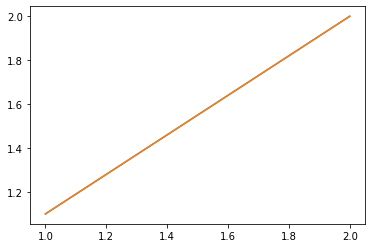

In [ ]:
import matplotlib.pyplot as plt
A = plt.plot([1,2],[1.1,2])
B = plt.plot([1,2],[1.1,2])
plt.show(A,B)

# Questão 2 
Seja o sistema

* 8,7x1 + 3,0x2 + 9,3x3 + 11,0x4 = 16,4
* 24,5x1 − 8,8x2 + 11,5x3 − 45,1x4 = −49,7
* 52,3x1 − 84,0x2 − 23,5x3 + 11,4x4 = −80,8
* 21,0x1 − 81,0x2 − 13,2x3 + 21,5x4 = −106,3

(a) Mostre que o SELA tem solução aproximada x0= (0, 97;1, 98;−0, 97;1, 00)

In [ ]:
import numpy as np

def resolveTS(A,b): #A Triangular Superior
    x = np.zeros(len(A))
    for i in range(len(A)-1,-1,-1):
        x[i] = (b[i] - (A[i][i+1:]*x[i+1:]).sum())/A[i][i]
    for j in range(len(x)):
      print("x"+str(j)+"= "+str(x[j]))

def eliminacaoGaussianaSimples(A,b):
    A = np.array(A)
    b = np.array(b)
    Au = np.zeros(A.shape)
    Ax = np.concatenate((A,b.reshape(len(b),1)),axis=1)
    for i in range(len(Ax)-1):
        Ax[i+1:] -= (Ax[i+1:,i]/Ax[i][i]).reshape((len(Au[i+1:]),1))*Ax[i]
        
    return resolveTS(Ax[:,:len(b)],Ax[:,len(b)])

In [ ]:
eliminacaoGaussianaSimples([[8.7,3.0,9.3,11.0],[24.5,-8.8,11.5,-45.1],[52.3,-84.0,-23.5,11.4],[21.0,-81.0,-13.2,21.5]],[16.4,-49.7,-80.8,-106.3])

x0= 0.9999999999999996
x1= 1.9999999999999991
x2= -1.0
x3= 1.0000000000000004


Utilizando o método de Eliminação Gaussiana para mostrar que o sistema tem solução aproximada de x0 = (0,97;1,98;-0,97;1,00) 

(b) Refina esta solução, retendo durante os cálculos duas casas decimais.

Calcule r=b−b0 =b−Ax0;

Determine x1 em Ax1 = r via método de Eliminação de Gauss com precisão dupla mas retendo duas casas decimais; Apresente sua solução refinada: X = x1 + x0.

In [ ]:
import numpy as np

def refinaSolucao(A, b):
  x0 = [0.97, 1.98, -0.97, 1.0]
  r0 = b - np.matmul(A,x0)
  x1 = eliminacaoGaussianaSimples(A,r0)
  X = x1 + x0
  for j in range(len(X)):
    print((X[j]))
  
def resolveTS(A,b): #A Triangular Superior
    x = np.zeros(len(A))
    for i in range(len(A)-1,-1,-1):
        x[i] = (b[i] - (A[i][i+1:]*x[i+1:]).sum())/A[i][i]
    return x

def eliminacaoGaussianaSimples(A,b):
    A = np.array(A)
    b = np.array(b)
    Au = np.zeros(A.shape)
    Ax = np.concatenate((A,b.reshape(len(b),1)),axis=1)
    for i in range(len(Ax)-1):
        Ax[i+1:] -= (Ax[i+1:,i]/Ax[i][i]).reshape((len(Au[i+1:]),1))*Ax[i]
        
    return resolveTS(Ax[:,:len(b)],Ax[:,len(b)])

In [ ]:
refinaSolucao([[8.7,3.0,9.3,11.0],[24.5,-8.8,11.5,-45.1],[52.3,-84.0,-23.5,11.4],[21.0,-81.0,-13.2,21.5]],[16.4,-49.7,-80.8,-106.3])

1.0
2.0
-1.0
1.0


Nesse caso, criei uma função que refina a solução aproximada, chamada de refinaSolucao, onde recebemos por parametro a matriz A, e o vetor de termos independentes b, onde x0 é que recebe os valores aproximados dados na questão a, r0 é o nosso resíduo, ou seja quanta falta para a solução ser exata, para isso calculamos a correção que chamamos de x1 através da função de eliminação gaussiana já conhecida, passando por parametro a nossa matriz A, e o residuo r0. Sendo X a nossa solução exata, x0 a solução aproximada, e x1 a correção, para encontrarmos o X somamos a solução aproximada com a correção que é justamente o resultado do resíduo, que neste caso é a solução com precisão maior.

# Questão 3
Resolva o sistema por Fatoração LU usando Doolittle (com pivotamento parcial) o SELA representado pela expressão matricial aplicando F (10, 3, e1, e2):



*   2 1 2 | 1
*   1 2 3 | 0
*   4 1 2 | 3 



In [ ]:
import numpy as np

def resolveTS(A,b): #A Triangular Superior
    x = np.zeros(len(A))
    for i in range(len(A)-1,-1,-1):
        x[i] = (b[i] - (A[i][i+1:]*x[i+1:]).sum())/A[i][i]
    return x

def resolveTI(A,b): #A Triangular Inferior
    x = np.zeros(len(b))
    for i in range(len(b)):
        x[i] = (b[i] - (A[i][:i]*x[:i]).sum())/A[i][i]
    return x

def verificaPivo(A):
    A = np.array(A)
    pode=True
    for i in range(len(A)):
        if np.linalg.det(A[:i,:i]) == 0:
            pode=False
    return pode 

def LUpivpar(A, tol=10e-3):
    A = np.array(A)
    bf = A.shape[0]
    L = np.zeros(A.shape)
    U = A.copy()
    P = np.identity(bf)
    for i in range(bf):
        ch = np.argmax(np.abs(U[i:,i])) + i
        if abs(A[ch,i]) < tol:
          error.err('A matriz é singular') 
        U[[i,ch]] = U[[ch,i]]
        L[[i,ch]] = L[[ch,i]]
        P[[i,ch]] = P[[ch,i]]
        L[i][i]=1
        for j in range(i+1,bf):
            ax = U[j][i]/U[i][i]
            L[j][i] = ax
            #Aqui houve um erro, onde eu acabei quebrando a cabeça e tive que aplicar uma "gambiarra", onde parece que os modelos de estatísticas ARIMA geram um erro porque não converte explicitamente int em float. Se eu tentar converter dados em float manualmente dessa forma, os modelos de estatísticas funcionarão bem.
            U = U.astype('float64')
            U[j] -= U[i]*ax
    return L,U,P

def resolveLUpar(L,U,P,b):
    m = resolveTI(L,np.dot(P,b))
    r = resolveTS(U,m)
    for j in range(len(r)):
      r[j] = int(r[j] * 10**3)/10**3
      print("x"+str(j)+"= "+str(r[j]))

In [ ]:
verificaPivo([[2,1,2],[1,2,3],[4,1,2]])
LUpivpar([[2,1,2],[1,2,3],[4,1,2]])
resolveLUpar([[1, 0, 0],[0.25, 1, 0],[0.5, 0.28571429, 1]],
             [[4, 1, 2],[0, 1.75, 2.5],[0, 0, 0.28571429]],
             [[0, 0, 1],[0, 1, 0],[1, 0, 0]],
             [1,0,3])

x0= 0.999
x1= 0.999
x2= -0.999


Sistemas onde o determinante de uma das submatrizes principais ($A_{1x1},A_{2x2},A_{3x3}...$) é igual a $0$ não podem ser resolvidos com a decomposição LU simples. Nestes casos, deve-se utilizar a pivotação parcial, onde o pivô é escolhido da linha com o maior elemento em módulo.

Contudo, é importante guardar as trocas de linha que foram efetuadas na matriz de permutações $P$. Esta matriz é uma matriz identidade com as linhas trocadas junto com a pivotação. Por exemplo, se na primeira coluna o maior elemento está na linha três, este será o primeiro pivô (a linha 1 será trocada com a 3). Neste caso, na matriz $P$ também se troca estas linhas. No fim do processo:

$PAx = Pb$

$LUx=Pb$

Então basta resolver trocando as linhas de b de através da multiplicação por P

Também foi implementado uma função chamada de verificaPivo, onde testamos a utilização da fatoração LU com pivotação parcial.

# Questão 4

Dados os SELAs:


S1 =
*   11x1 + 13x2 = 286
*   11x1 - 9x2 = 99

S2 =
*   11x1 - 9x2 = 99
*   11x1 + 13x2 = 286 

(a) Mostre que na resolução do sistema pelo método de iterativo de Gauss-Seidel a convergência depende da ordem das equações.

In [ ]:
def gaussSeidel(A,b,vetorSolucao,iteracoes):
  iteracao = 0
  while iteracao < iteracoes:
    for i in range(len(A)):
      x = b[i]
      for j in range(len(A)):
        if i != j:
          x -= A[i][j]*vetorSolucao[j]
      x /= A[i][i]
      vetorSolucao[i] = x
      iteracao += 1

  print(vetorSolucao)

In [ ]:
gaussSeidel([[11,13],[11,-9]],[286,99],[0,0],100)
gaussSeidel([[11,-9],[11,13]],[99,286],[0,0],100)

[-671909657.0626988, -821222925.1877431]
[15.9545455585201, 8.499999912021453]


(b) Identifique qual dos sistemas está representado nos gráficos (a) e (b) abaixo, partindo da origem (0, 0). Justifique porque isso ocorre.

No método de gauss Seidel por ser um método iterativo ele tem um critério de convergência, em geral o método converge se: O critério das linhas for atendido, ou, se a matriz for estritamente diagonal dominante, ou, se o critério de Sassenfeld for atendido. 

O que temos na questão 4, simplesmente olhando o gráfico do sistema 1 e do sistema 2, notamos que são dois sistemas com solução única, onde no primeiro o método diverge, e no segundo o método converge. Na célula abaixo eu implementei o código do critério de sassenfeld para mostrar melhor como o sistema 1 diverge, e o sistema 2 converge.

O sistema 1 ("S1") está representado no gráfico b, pois está cada vez se afastando mais do ponto, dessa forma, divergindo, a cada iteração se afastando mais da intersecção entre as duas retas, onde em 100 iterações já temos um número muito afastado.

O sistema 2 ("S2") está representado no gráfico a, pois está cada vez mais chegando perto do ponto, dessa forma, convergindo, a cada iteração, se aproximando mais da solução.

In [ ]:
import math

def criterioSassenfeld(A):
  coeficientes = []
  for i in range(len(A)):
    b = 0
    for j in range(len(A)):
      if i!= j and i == 0:
        b += A[i][j]
      elif i!= j and i != 0:
        b+=A[i][j]*coeficientes[j]
    b/= A[i][i]
    coeficientes.append(b)

  maiorCoeficiente = max(coeficientes)
  if maiorCoeficiente < 1:
    print("O método de Gauss-Seidel irá convergir")
  else:
    print("Não se tem certeza sobre a convergência do método de Gauss-Seidel para o sistema dado.")
      

In [ ]:
#SISTEMA S1
criterioSassenfeld([[11,13],[11,-9]])
#SISTEMA S2
criterioSassenfeld([[11,-9],[11,13]])

NameError: ignored